In [46]:
# IMPORT LIBARIES AND DEPENDENCIES 
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
import plotly.express as px
%matplotlib inline
import hvplot.pandas
import seaborn as sns

In [47]:
#PULL IN STOCK DATA FOR 2020
#IMPORT STOCK DATA FOR 3 HIGHEST CAP STOCKS IN THE 3 MOST RESILIENT AND 3 LEAST RESILIENT MSCI INDEXES
#Walmart, P&G, J&J. \\\
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [48]:
#VERIFY API KEYS ARE PULLING IN CORRECTLY
type(alpaca_api_key)

str

In [49]:
type(alpaca_secret_key)

str

In [50]:
len(alpaca_api_key)

20

In [51]:
len(alpaca_secret_key)

40

In [52]:
#SET API
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [53]:
#COMBINE DATA INTO ONE DF
list_of_tickers = ["WMT", "JNJ", "PG","JPM", "MCD","XOM"]

# YOUR CODE HERE
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]

In [54]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
asset_info_df.sample(5)

,symbol
1606,FSMB
8615,MTBC
8991,EMIF
26,GNRS
4199,NNN-F


In [55]:
#DELINEATE RESILIENT TICKERS DATAFRAME FROM NON-RESILIENT TICKER DATAFRAME
#SETUP RESILIENT DF
resil_tickers = ["WMT", "JNJ", "PG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-252)

# Get 1 year's worth of historical data for WMT, JNJ and PG
dfr = api.get_barset(
    resil_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
dfr.head(10)

JNJ                                       \
                             open      high       low   close   volume   
2019-12-23 00:00:00-05:00  145.74  146.7600  145.3401  146.41  3575567   
2019-12-24 00:00:00-05:00  146.00  146.0100  145.2600  145.97  1729932   
2019-12-26 00:00:00-05:00  145.97  146.1827  145.1600  145.83  2233533   
2019-12-27 00:00:00-05:00  146.20  146.5500  145.5400  145.76  1939538   
2019-12-30 00:00:00-05:00  145.78  146.2000  145.0300  145.35  2089996   
2019-12-31 00:00:00-05:00  145.10  146.0100  144.7800  145.82  2541672   
2020-01-02 00:00:00-05:00  145.87  146.0200  145.0800  146.00  4380284   
2020-01-03 00:00:00-05:00  143.50  145.3730  143.0000  144.22  4547772   
2020-01-06 00:00:00-05:00  144.00  144.2000  142.8500  144.11  5168337   
2020-01-07 00:00:00-05:00  144.01  145.4500  141.3800  144.99  6039721   

                               PG                                       \
                             open      high       low   close   volume   
2019-12-23 00:00:00-05:00  125.52  125.8200  124.6850  124.91  4649046   
2019-12-24 00:00:00-05:00  124.79  125.3099  124.5800  125.18  1798951   
2019-12-26 00:00:00-05:00  125.10  125.7450  124.8700  125.23  3566876   
2019-12-27 00:00:00-05:00  125.56  126.2950  125.3900  126.07  2975061   
2019-12-30 00:00:00-05:00  125.76  125.9800  124.1400  124.51  2931062   
2019-12-31 00:00:00-05:00  124.43  124.9900  123.9500  124.87  2986857   
2020-01-02 00:00:00-05:00  124.50  124.7300  122.9400  123.41  5965498   
2020-01-03 00:00:00-05:00  122.16  123.5300  121.8600  122.53  5620548   
2020-01-06 00:00:00-05:00  122.57  123.1900  122.3787  122.75  4535596   
2020-01-07 00:00:00-05:00  122.88  123.2059  121.8700  122.01  4786221   

                              WMT                                       
                             open      high       low   close   volume  
2019-12-23 00:00:00-05:00  120.20  120.6900  119.0100  119.03  3504298  
2019-12-24 00:00:00-05:00  119.13  119.6000  119.0100  119.52  1991969  
2019-12-26 00:00:00-05:00  119.61  119.8500  118.9500  119.55  3062390  
2019-12-27 00:00:00-05:00  119.94  119.9400  119.2450  119.57  2557506  
2019-12-30 00:00:00-05:00  119.80  119.8100  119.1300  119.42  2373893  
2019-12-31 00:00:00-05:00  119.50  119.8000  118.1900  118.79  3439010  
2020-01-02 00:00:00-05:00  118.86  119.8900  118.7016  118.94  5449703  
2020-01-03 00:00:00-05:00  118.27  118.7886  117.5900  117.86  3749591  
2020-01-06 00:00:00-05:00  117.40  118.0900  116.7700  117.65  3943106  
2020-01-07 00:00:00-05:00  117.26  117.5150  116.2000  116.53  4709531

In [56]:
#CLEAN UP THE COLUMNS TO ONLY SHOW CLOSE & DATE
dfr.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
dfr.head(10)

,JNJ,PG,WMT
,close,close,close
2019-12-23 00:00:00-05:00,146.41,124.91,119.03
2019-12-24 00:00:00-05:00,145.97,125.18,119.52
2019-12-26 00:00:00-05:00,145.83,125.23,119.55
2019-12-27 00:00:00-05:00,145.76,126.07,119.57
2019-12-30 00:00:00-05:00,145.35,124.51,119.42
2019-12-31 00:00:00-05:00,145.82,124.87,118.79
2020-01-02 00:00:00-05:00,146.00,123.41,118.94
2020-01-03 00:00:00-05:00,144.22,122.53,117.86
2020-01-06 00:00:00-05:00,144.11,122.75,117.65


In [57]:
#DEFINE DAILY RETURNS FOR RESILIENT DF
resil_daily_returns = dfr.pct_change()
resil_daily_returns.head(10)

,JNJ,PG,WMT
,close,close,close
2019-12-23 00:00:00-05:00,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,-0.003005,0.002162,0.004117
2019-12-26 00:00:00-05:00,-0.000959,0.000399,0.000251
2019-12-27 00:00:00-05:00,-0.000480,0.006708,0.000167
2019-12-30 00:00:00-05:00,-0.002813,-0.012374,-0.001254
2019-12-31 00:00:00-05:00,0.003234,0.002891,-0.005275
2020-01-02 00:00:00-05:00,0.001234,-0.011692,0.001263
2020-01-03 00:00:00-05:00,-0.012192,-0.007131,-0.009080
2020-01-06 00:00:00-05:00,-0.000763,0.001795,-0.001782


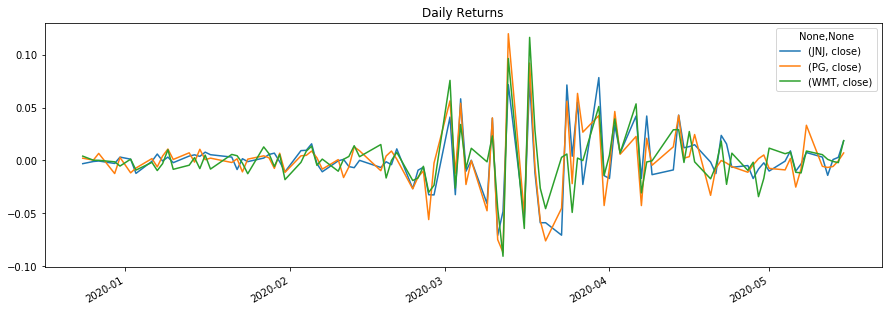

In [58]:
#PLOT DAILY RETURNS FOR RESILIENT DF
resil_daily_returns.plot(figsize=(15, 5), title="Daily Returns")

In [59]:
#CALCULATE AVERAGE DAILY RETURNS OF RESILIENT STOCKS
avg_daily_return_wmt = resil_daily_returns.mean()['WMT']['close']
avg_daily_return_jnj = resil_daily_returns.mean()['JNJ']['close']
avg_daily_return_pg = resil_daily_returns.mean()['PG']['close']
print(f"The Mean of Daily Returns are: Walmart: {avg_daily_return_wmt}, Johnson & Johnson: {avg_daily_return_jnj}, Proctor & Gamble: {avg_daily_return_pg}")

The Mean of Daily Returns are: Walmart: 0.000907619986619063, Johnson & Johnson: 0.0006353754050049469, Proctor & Gamble: -0.00041423100700104063


In [60]:
#CALCULATE STD OF RETURNS OF RESILIENT STOCKS
std_daily_return_wmt = resil_daily_returns.std()['WMT']['close']
std_daily_return_jnj = resil_daily_returns.std()['JNJ']['close']
std_daily_return_pg = resil_daily_returns.std()['PG']['close']
print(f"The Standard Deviation of Returns: Walmart: {std_daily_return_wmt}, Johnson & Johnson: {std_daily_return_jnj}, Proctor & Gamble: {std_daily_return_pg}")

The Standard Deviation of Returns: Walmart: 0.026860125402178314, Johnson & Johnson: 0.02718294389067585, Proctor & Gamble: 0.03026705230069645


In [61]:
#DELINEATE RESILIENT TICKERS DATAFRAME FROM NON-RESILIENT TICKER DATAFRAME
#SETUP NON-RESILIENT DF
nonresil_tickers = ["JPM", "MCD", "XOM"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-252)

# Get 1 year's worth of historical data for JPM, MCD and XOM
dfnr = api.get_barset(
    nonresil_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
dfnr.head(10)

JPM                                        MCD  \
                             open    high       low   close   volume    open   
2019-12-23 00:00:00-05:00  137.60  137.91  136.8800  137.22  6193775  197.54   
2019-12-24 00:00:00-05:00  137.33  137.63  137.0641  137.58  2824296  195.93   
2019-12-26 00:00:00-05:00  137.89  139.10  137.7800  139.09  4753888  196.61   
2019-12-27 00:00:00-05:00  139.30  139.77  138.6697  139.14  4864945  197.33   
2019-12-30 00:00:00-05:00  139.90  140.08  138.4700  138.68  5571805  197.58   
2019-12-31 00:00:00-05:00  138.51  139.48  138.2950  139.40  4896689  196.80   
2020-01-02 00:00:00-05:00  139.79  141.10  139.2650  141.09  8484783  198.00   
2020-01-03 00:00:00-05:00  137.50  139.23  137.0800  138.28  8191470  199.39   
2020-01-06 00:00:00-05:00  136.56  138.27  136.5000  138.21  6884814  199.60   
2020-01-07 00:00:00-05:00  137.28  137.86  135.8200  135.87  8859207  201.87   

                                                                  XOM  \
                               high       low   close   volume   open   
2019-12-23 00:00:00-05:00  197.5400  196.0300  196.23  1675904  69.86   
2019-12-24 00:00:00-05:00  197.1400  195.6700  196.68   712857  70.35   
2019-12-26 00:00:00-05:00  197.1600  196.1627  197.16  1212708  70.19   
2019-12-27 00:00:00-05:00  198.4700  197.1750  198.16  1504372  70.20   
2019-12-30 00:00:00-05:00  197.8000  195.9400  196.99  1780512  70.09   
2019-12-31 00:00:00-05:00  197.9500  196.5579  197.55  1694891  69.02   
2020-01-02 00:00:00-05:00  200.8000  197.8100  200.80  2886391  70.24   
2020-01-03 00:00:00-05:00  200.5500  198.8500  200.02  2031901  71.34   
2020-01-06 00:00:00-05:00  202.7673  199.3500  202.33  3558314  70.32   
2020-01-07 00:00:00-05:00  202.6800  200.5100  202.63  3132535  70.50   

                                                              
                              high      low  close    volume  
2019-12-23 00:00:00-05:00  70.3000  69.5300  70.29   9451860  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006  
2019-12-30 00:00:00-05:00  70.4350  69.4000  69.48  10463554  
2019-12-31 00:00:00-05:00  69.8000  69.0100  69.76   9526602  
2020-01-02 00:00:00-05:00  71.0200  70.2368  70.90  10586614  
2020-01-03 00:00:00-05:00  71.3700  70.1600  70.32  14148606  
2020-01-06 00:00:00-05:00  71.3550  70.2300  70.87  16859539  
2020-01-07 00:00:00-05:00  70.5200  69.5100  70.28  11583116

In [62]:
#CLEAN UP THE COLUMNS TO ONLY SHOW CLOSE & DATE
dfnr.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
dfnr.head(10)

,JPM,MCD,XOM
,close,close,close
2019-12-23 00:00:00-05:00,137.22,196.23,70.29
2019-12-24 00:00:00-05:00,137.58,196.68,70.02
2019-12-26 00:00:00-05:00,139.09,197.16,70.13
2019-12-27 00:00:00-05:00,139.14,198.16,69.89
2019-12-30 00:00:00-05:00,138.68,196.99,69.48
2019-12-31 00:00:00-05:00,139.40,197.55,69.76
2020-01-02 00:00:00-05:00,141.09,200.80,70.90
2020-01-03 00:00:00-05:00,138.28,200.02,70.32
2020-01-06 00:00:00-05:00,138.21,202.33,70.87


In [63]:
#DEFINE DAILY RETURNS FOR NON-RESILIENT DF
nonresil_daily_returns = dfnr.pct_change()
nonresil_daily_returns.head(10)

,JPM,MCD,XOM
,close,close,close
2019-12-23 00:00:00-05:00,NaN,NaN,NaN
2019-12-24 00:00:00-05:00,0.002624,0.002293,-0.003841
2019-12-26 00:00:00-05:00,0.010975,0.002441,0.001571
2019-12-27 00:00:00-05:00,0.000359,0.005072,-0.003422
2019-12-30 00:00:00-05:00,-0.003306,-0.005904,-0.005866
2019-12-31 00:00:00-05:00,0.005192,0.002843,0.004030
2020-01-02 00:00:00-05:00,0.012123,0.016452,0.016342
2020-01-03 00:00:00-05:00,-0.019916,-0.003884,-0.008181
2020-01-06 00:00:00-05:00,-0.000506,0.011549,0.007821


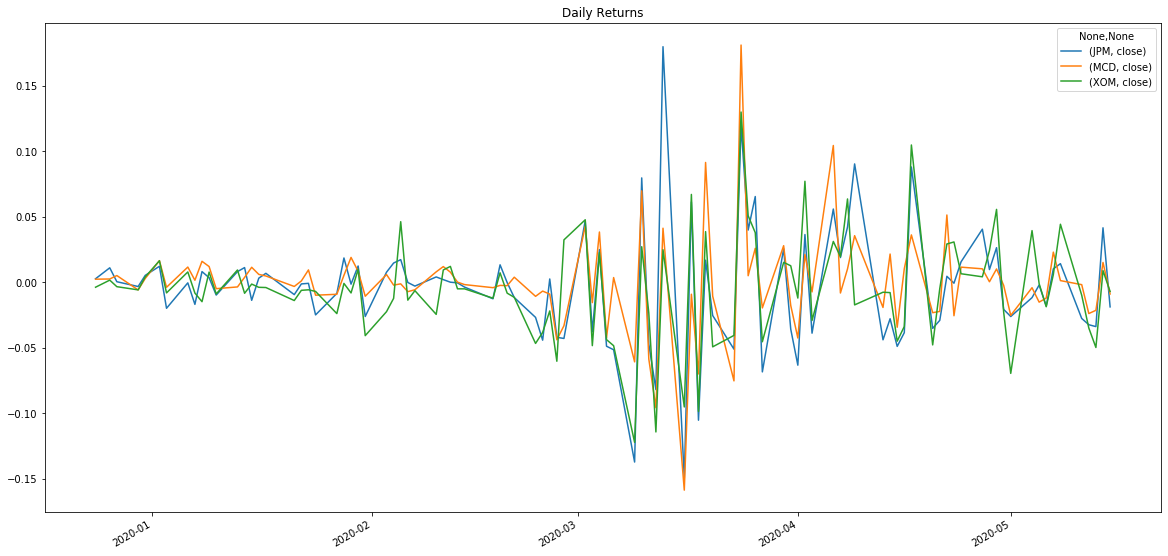

In [64]:
#PLOT DAILY RETURNS FOR NON-RESILIENT DF
nonresil_daily_returns.plot(figsize=(20, 10), title="Daily Returns")

In [65]:
#CALCULATE AVERAGE DAILY RETURNS OF NON-RESILIENT STOCKS
avg_daily_return_JPM = nonresil_daily_returns.mean()['JPM']['close']
avg_daily_return_MCD = nonresil_daily_returns.mean()['MCD']['close']
avg_daily_return_XOM = nonresil_daily_returns.mean()['XOM']['close']
print(f"The Mean of Daily Returns are: JP Morgan: {avg_daily_return_wmt}, McDonald's Corp: {avg_daily_return_jnj}, Exxon Mobile Corporation: {avg_daily_return_pg}")

The Mean of Daily Returns are: JP Morgan: 0.000907619986619063, McDonald's Corp: 0.0006353754050049469, Exxon Mobile Corporation: -0.00041423100700104063


In [66]:
#CALCULATE STD OF RETURNS OF NON-RESILIENT STOCKS
std_daily_return_JPM = nonresil_daily_returns.std()['JPM']['close']
std_daily_return_MCD = nonresil_daily_returns.std()['MCD']['close']
std_daily_return_XOM = nonresil_daily_returns.std()['XOM']['close']
print(f"The Standard Deviation of Returns: JP Morgan: {std_daily_return_wmt}, McDonald's Corp: {std_daily_return_jnj}, Exxon Mobile Corporation: {std_daily_return_pg}")

The Standard Deviation of Returns: JP Morgan: 0.026860125402178314, McDonald's Corp: 0.02718294389067585, Exxon Mobile Corporation: 0.03026705230069645


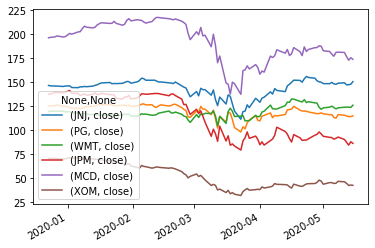

In [67]:
#CREATE AGGREGATE PLOT BY COMBINING NON-RESILIENT DF w/ RESILIENT DF FOR COMPARISON
#all_tickers = (dfnr + dfr)
ax = dfr.plot()
dfnr.plot(ax=ax)

## CALCULATE ROLLING

### PLOT DAILY CLOSING PRICES FOR BOTH RESILIENT & NON-RESILIENT STOCKS

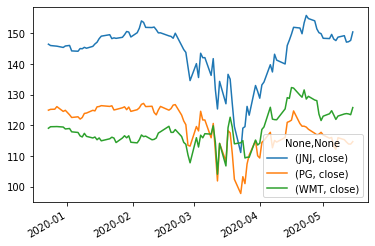

In [68]:
# RESILIENT
dfr.plot()

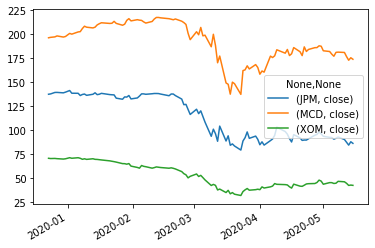

In [69]:
#NON-RESILIENT
dfnr.plot()

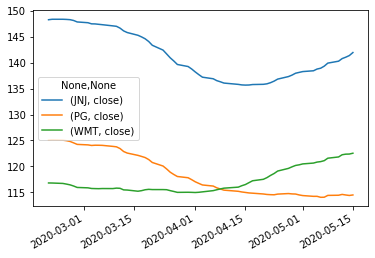

In [70]:
#ROLLING 40-DAY MEAN OF CLOSING PRICES FOR RESILIENT STOCKS
dfr.rolling(window=40).mean().plot()

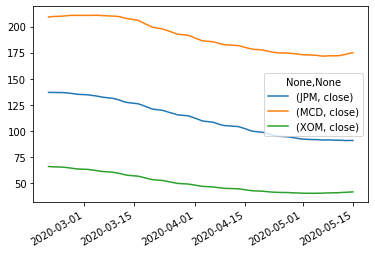

In [71]:
#ROLLING 40-DAY MEAN OF CLOSING PRICES FOR NON-RESILIENT STOCKS
dfnr.rolling(window=40).mean().plot()

In [72]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2019-12-23 00:00:00-05:00 to 2020-05-15 00:00:00-04:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (JNJ, close)  100 non-null    float64
 1   (PG, close)   100 non-null    float64
 2   (WMT, close)  100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


In [76]:
returns = dfr.pct_change()

In [77]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [89]:
returns = dfr.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [90]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=dfr.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=dfr.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.42


             JNJ    PG    WMT
           close close  close
allocation  5.28  0.21  94.51
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.4


              JNJ    PG    WMT
            close close  close
allocation  47.96  0.11  51.93


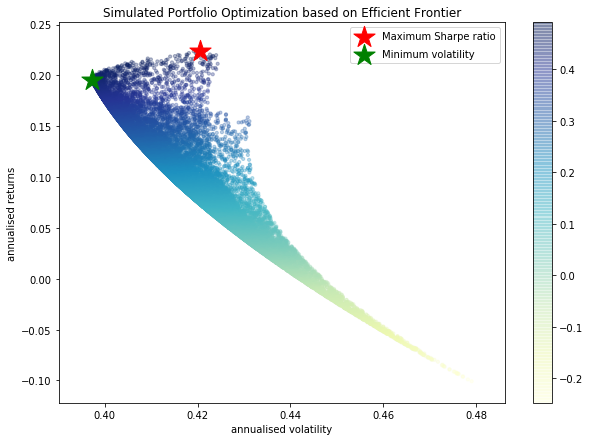

In [91]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [92]:
import scipy.optimize as sco

In [93]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [94]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [95]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [96]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=dfr.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=dfr.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [97]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=dfr.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=dfr.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(dfr.columns):
        print (txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(dfr.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.43


             JNJ    PG    WMT
           close close  close
allocation   0.0   0.0  100.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.4


             JNJ    PG   WMT
           close close close
allocation  47.9   0.0  52.1
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

('JNJ', 'close') : annualised return 0.16 , annualised volatility: 0.43
('PG', 'close') : annualised return -0.1 , annualised volatility: 0.48
('WMT', 'close') : annualised return 0.23 , annualised volatility: 0.42
--------------------------------------------------------------------------------


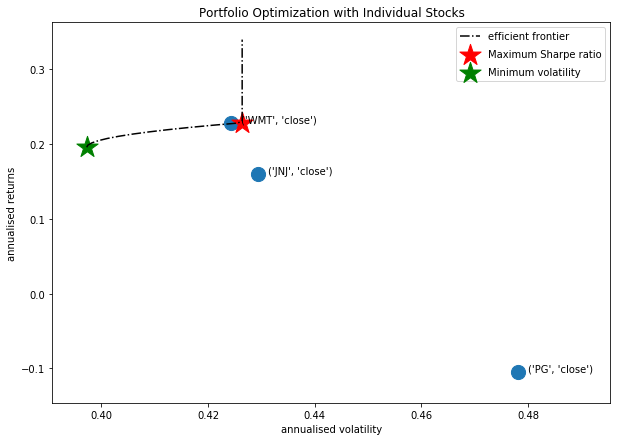

In [98]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)